In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

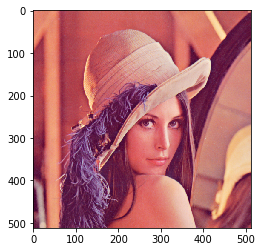

In [2]:
imgbgr = cv2.imread('lena.png')
img = imgbgr[:,:,::-1]
imgbw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [3]:
img.size

786432

In [4]:
img.shape

(512, 512, 3)

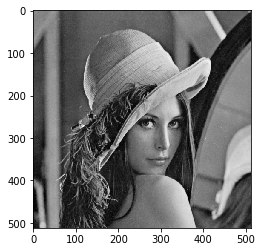

In [5]:
plt.imshow(imgbw, cmap='gray')

In [6]:
imgbw.shape

(512, 512)

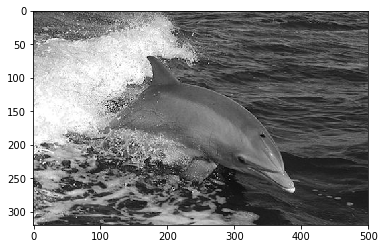

In [7]:
dolphin = cv2.imread('dolphin.png')
plt.imshow(dolphin, cmap='gray')

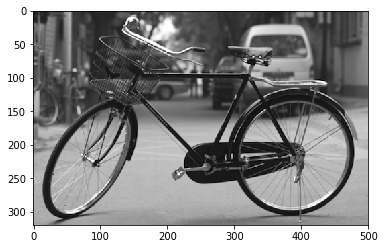

In [8]:
bicycle = cv2.imread('bicycle.png')
plt.imshow(bicycle, cmap='gray')

## Add

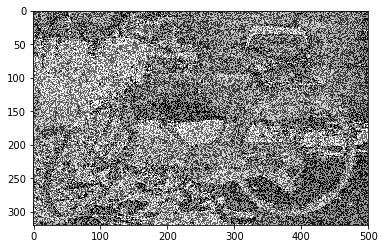

In [9]:
avg = (bicycle+dolphin)/2  # overfloww
plt.imshow(avg, cmap='gray')

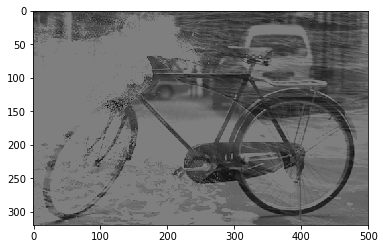

In [10]:
avg = cv2.add(dolphin, bicycle) // 2  # clip both
plt.imshow(avg, cmap='gray')

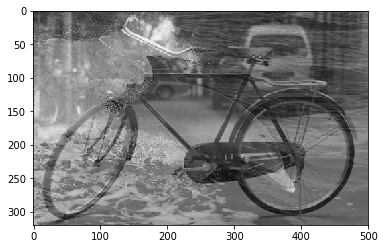

In [11]:
avg = cv2.add(dolphin // 2, bicycle // 2)  # requantize both
plt.imshow(avg, cmap='gray')

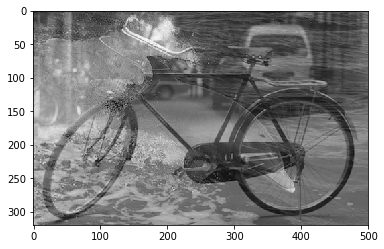

In [12]:
avg = cv2.addWeighted(dolphin, 0.5, bicycle, 0.5, 0)  # requantize both
plt.imshow(avg, cmap='gray')

## Multiplication

In [13]:
cv2.multiply(dolphin, 2, )[:,:,0]

array([[146, 138, 144, ...,  64,  76,  84],
       [164,  74, 114, ..., 142, 140, 126],
       [194, 116, 130, ..., 192, 198, 194],
       ..., 
       [255, 255, 255, ..., 118, 110, 100],
       [255, 255, 255, ..., 110, 112, 112],
       [246, 255, 255, ..., 128, 128, 126]], dtype=uint8)

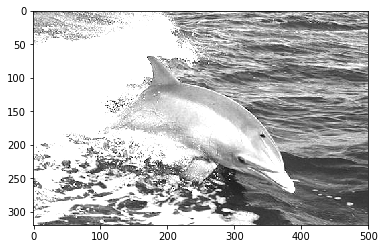

In [14]:
plt.imshow(cv2.multiply(dolphin, 2)[:,:,0], cmap='gray', vmin=0, vmax=255)

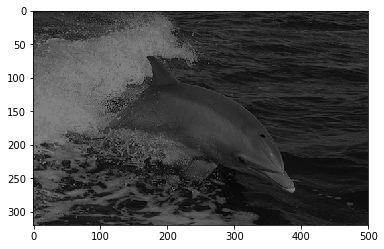

In [15]:
plt.imshow(cv2.multiply(dolphin, 0.5)[:,:,0], cmap='gray', vmin=0, vmax=255)

## Subtraction

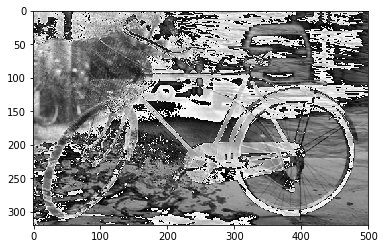

In [16]:
plt.imshow(bicycle-dolphin, cmap='gray', vmin=0, vmax=255)  # overflow

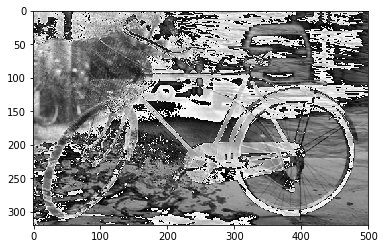

In [17]:
plt.imshow(abs(bicycle-dolphin), cmap='gray', vmin=0, vmax=255)  # overflow

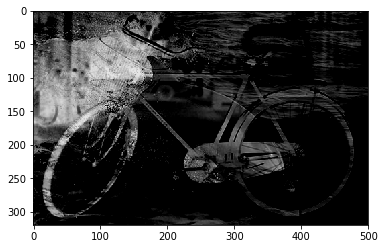

In [18]:
plt.imshow(cv2.subtract(dolphin, bicycle), cmap='gray', vmin=0, vmax=255)  # clip at 0

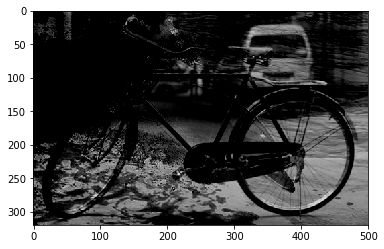

In [19]:
plt.imshow(cv2.subtract(bicycle, dolphin), cmap='gray', vmin=0, vmax=255)  # clip at 0

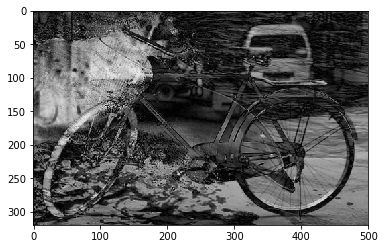

In [20]:
#absdiff = cv2.subtract(dolphin, bicycle) + cv2.subtract(bicycle, dolphin)
plt.imshow(cv2.absdiff(dolphin, bicycle), cmap='gray', vmin=0, vmax=255)

## Noise

[[  3   1   5  17   3]
 [-14 -14 -13   6 -13]
 [ -9  -5  21  -3  11]
 [  0   7   6   6 -14]
 [  6   8  -1   9  -3]]


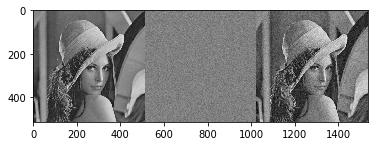

In [21]:
mean = 0
var = 100
sigma = var**0.5
gauss = np.random.normal(mean, sigma, imgbw.shape)
gauss = gauss.astype(np.int8)
print(gauss[:5,:5])
noisy = cv2.add(imgbw, gauss, dtype=cv2.CV_8U)
plt.imshow(np.hstack((imgbw, gauss+128, noisy)), cmap='gray', vmin=0, vmax=255)

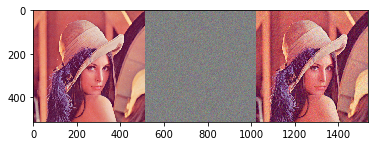

In [22]:
mean = 0
var = 100
sigma = var**0.5
gauss = np.random.normal(mean, sigma, img.shape)
gauss = gauss.astype(np.int8)
noisy = cv2.add(img, gauss, dtype=cv2.CV_8U)
gauss_offset = cv2.add(gauss, (128, 128, 128, 0), dtype=cv2.CV_8UC3)
plt.imshow(np.hstack((img, gauss_offset, noisy)))